# Project: Bankruptcy Prevention

### 1. Importing Required Libraries

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier
import xgboost as xgb  
import lightgbm as lgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 2. Loading the Dataset

In [86]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\Bankruptcy Prediction.csv")
df.head(10)


Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          
5          1                                           0.388680          
6          0                                           0.390923          
7          0                                           0.508361          
8          0                                           0.488519          
9          0                                           0.495686          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   
5                                 0.415177   
6                                 0.445704   
7                                 0.570922   
8                                 0.545137   
9                                 0.550916   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    
5                                           0.419134    
6                                           0.436158    
7                                           0.559077    
8                                           0.543284    
9                                           0.542963    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   
5                 0.590171                      0.590251   
6                 0.619950                      0.619950   
7                 0.601738                      0.601717   
8                 0.603612                      0.603612   
9                 0.599209                      0.599209   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   
5                0.998758                    0.796903   
6                0.998993                    0.797012   
7                0.999009                    0.797449   
8                0.998961                    0.797414   
9                0.999001                    0.797404   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   
5                      0.808771                                      0.303116   
6                      0.808960                                      0.302814   
7                      0.809362                                      0.303545   
8                      0.809338    

### 3. Exploratory Data Analysis (EDA)

In [87]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [88]:
df.isnull().sum()
df.notnull().sum()
df.duplicated().sum()


0

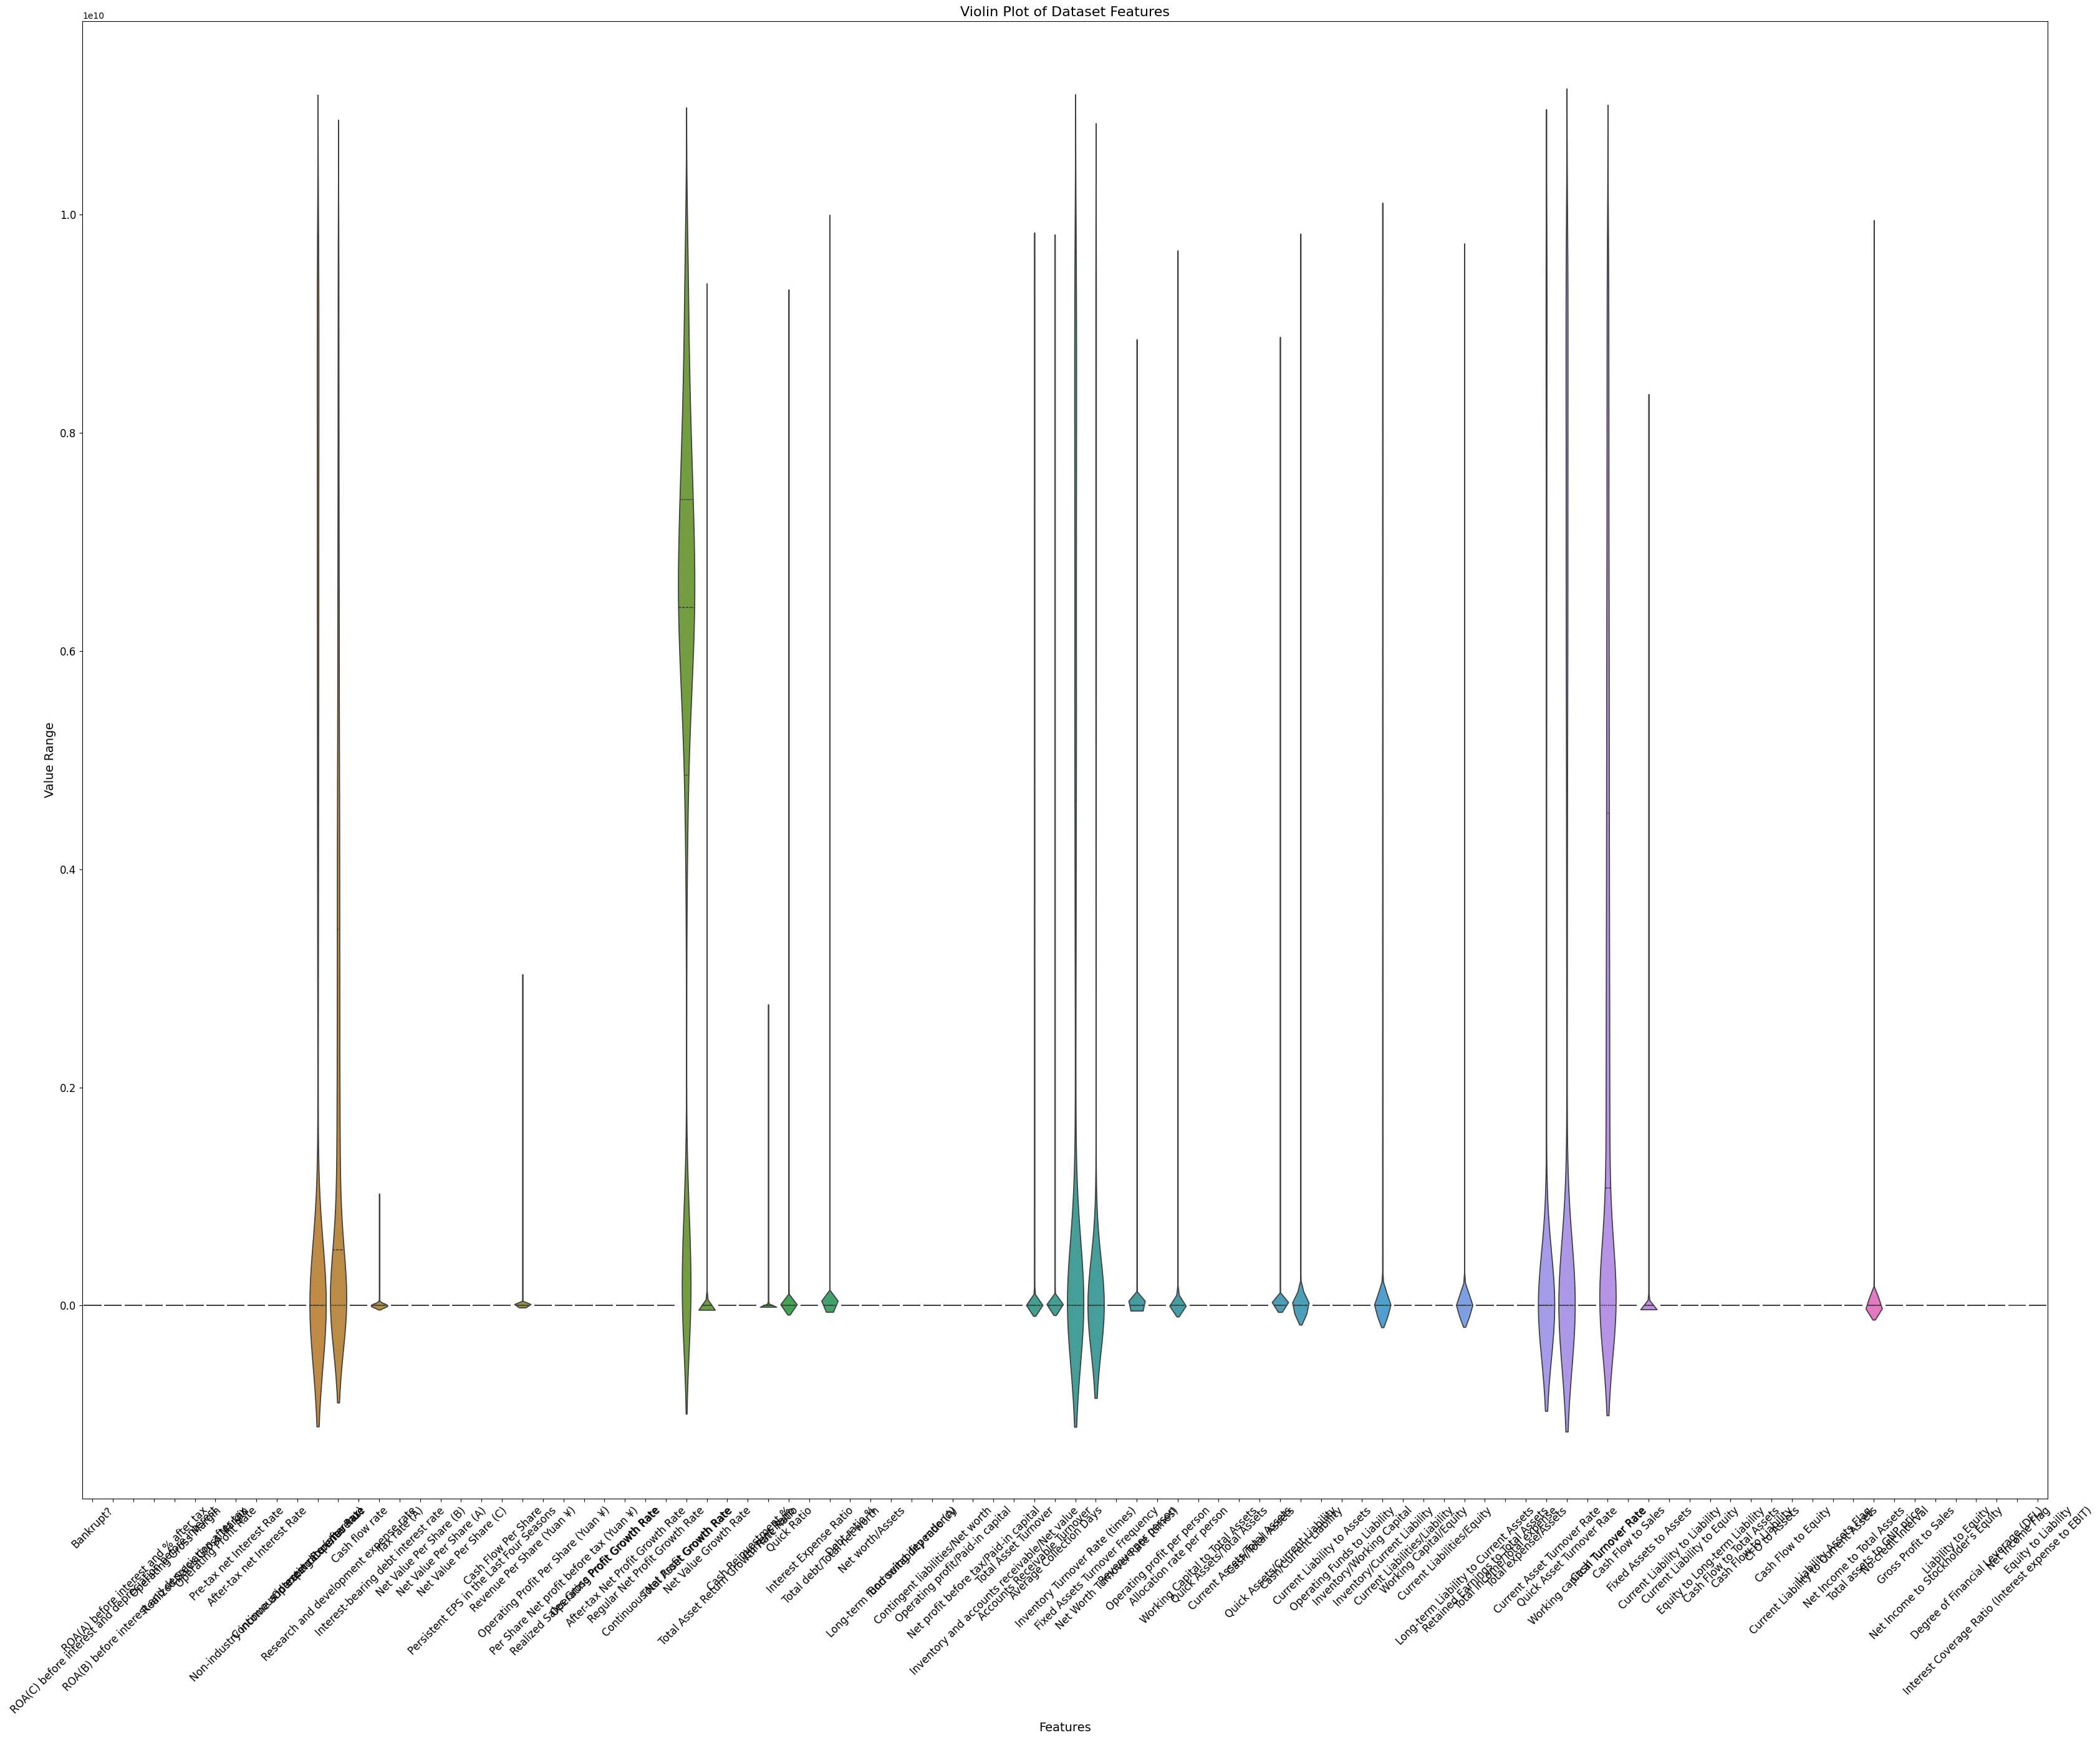

In [136]:
plt.figure(figsize=(34,28))
sns.violinplot(data=df, inner="quartile")
plt.title('Violin Plot of Dataset Features', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Value Range', fontsize=14)
plt.tight_layout()
plt.show()

In [90]:
# Calculate Q1, Q3, IQR, and outlier boundaries
Q3 = df.quantile(0.75)
Q1 = df.quantile(0.25)
IQR = Q3 - Q1
Lower_extreme = Q1 - 1.5 * IQR
Upper_extreme = Q3 + 1.5 * IQR

In [91]:


# Identifying outliers
# Applying the conditions directly to each column
data_outliers = df[((df < Lower_extreme) | (df > Upper_extreme)).any(axis=1)]
data_with_no_outliers = df[~((df < Lower_extreme) | (df > Upper_extreme)).any(axis=1)]




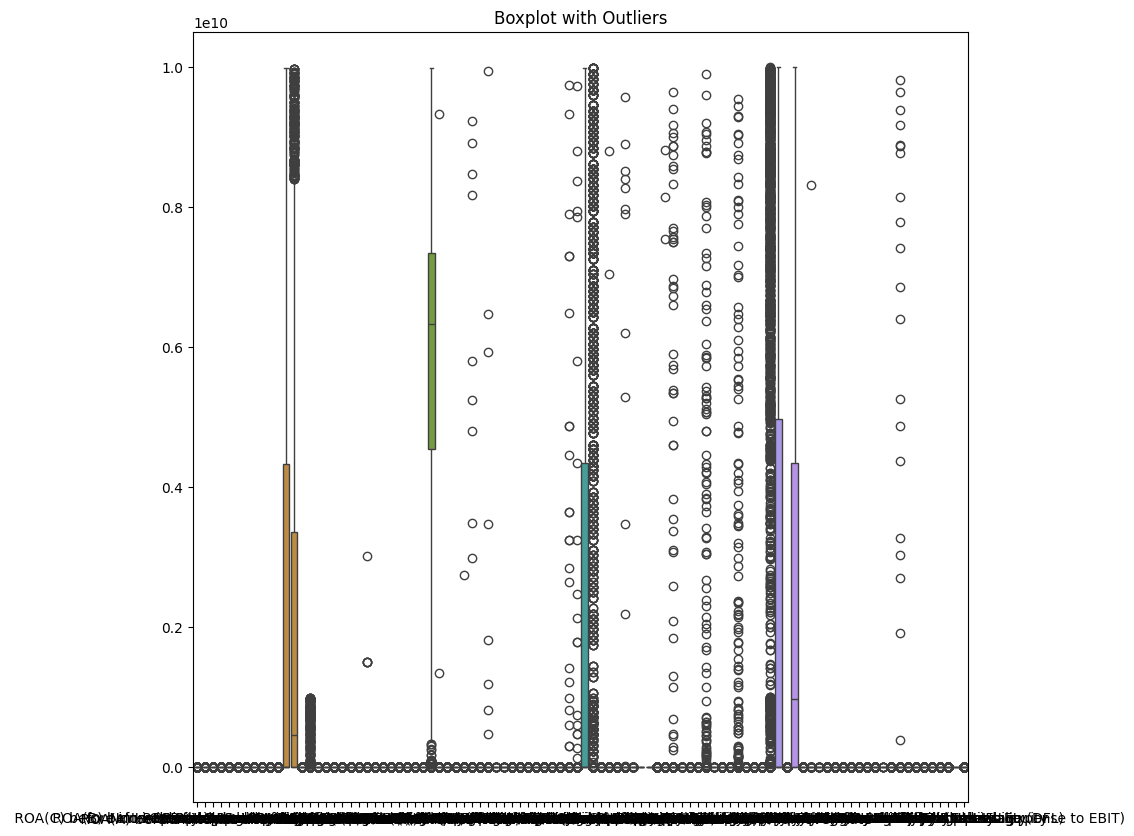

In [135]:
# Boxplot with outliers (filtered data)
plt.figure(figsize=(10, 10))
sns.boxplot(data=data_outliers)
plt.title('Boxplot with Outliers')
plt.show()



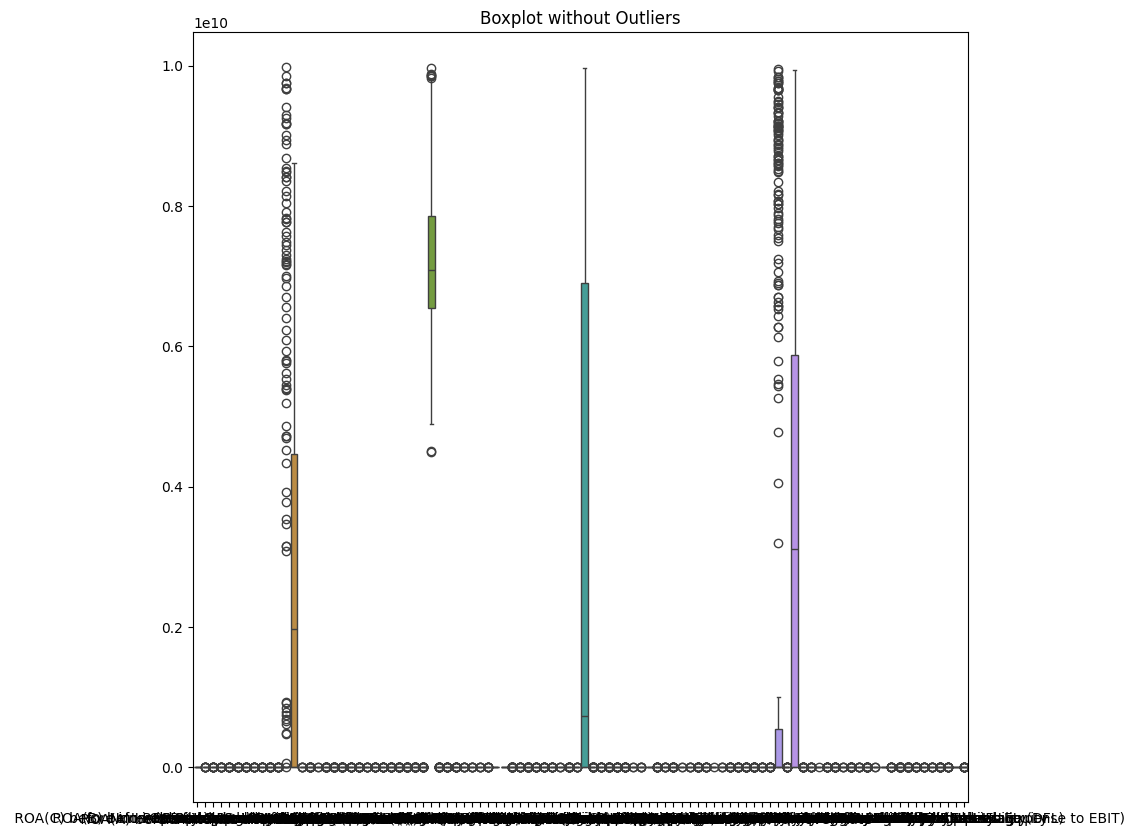

In [137]:
# Boxplot without outliers (filtered data)
plt.figure(figsize=(10, 10))
sns.boxplot(data=data_with_no_outliers)
plt.title('Boxplot without Outliers')
plt.show()

In [94]:

correlations=df.corr()['Bankrupt?'].abs().sort_values()
num_col_to_drop=int(0.7 * len(df.columns))
cols_drop=correlations.iloc[:num_col_to_drop].index
df_dropped= df.drop(cols_drop, axis=1)

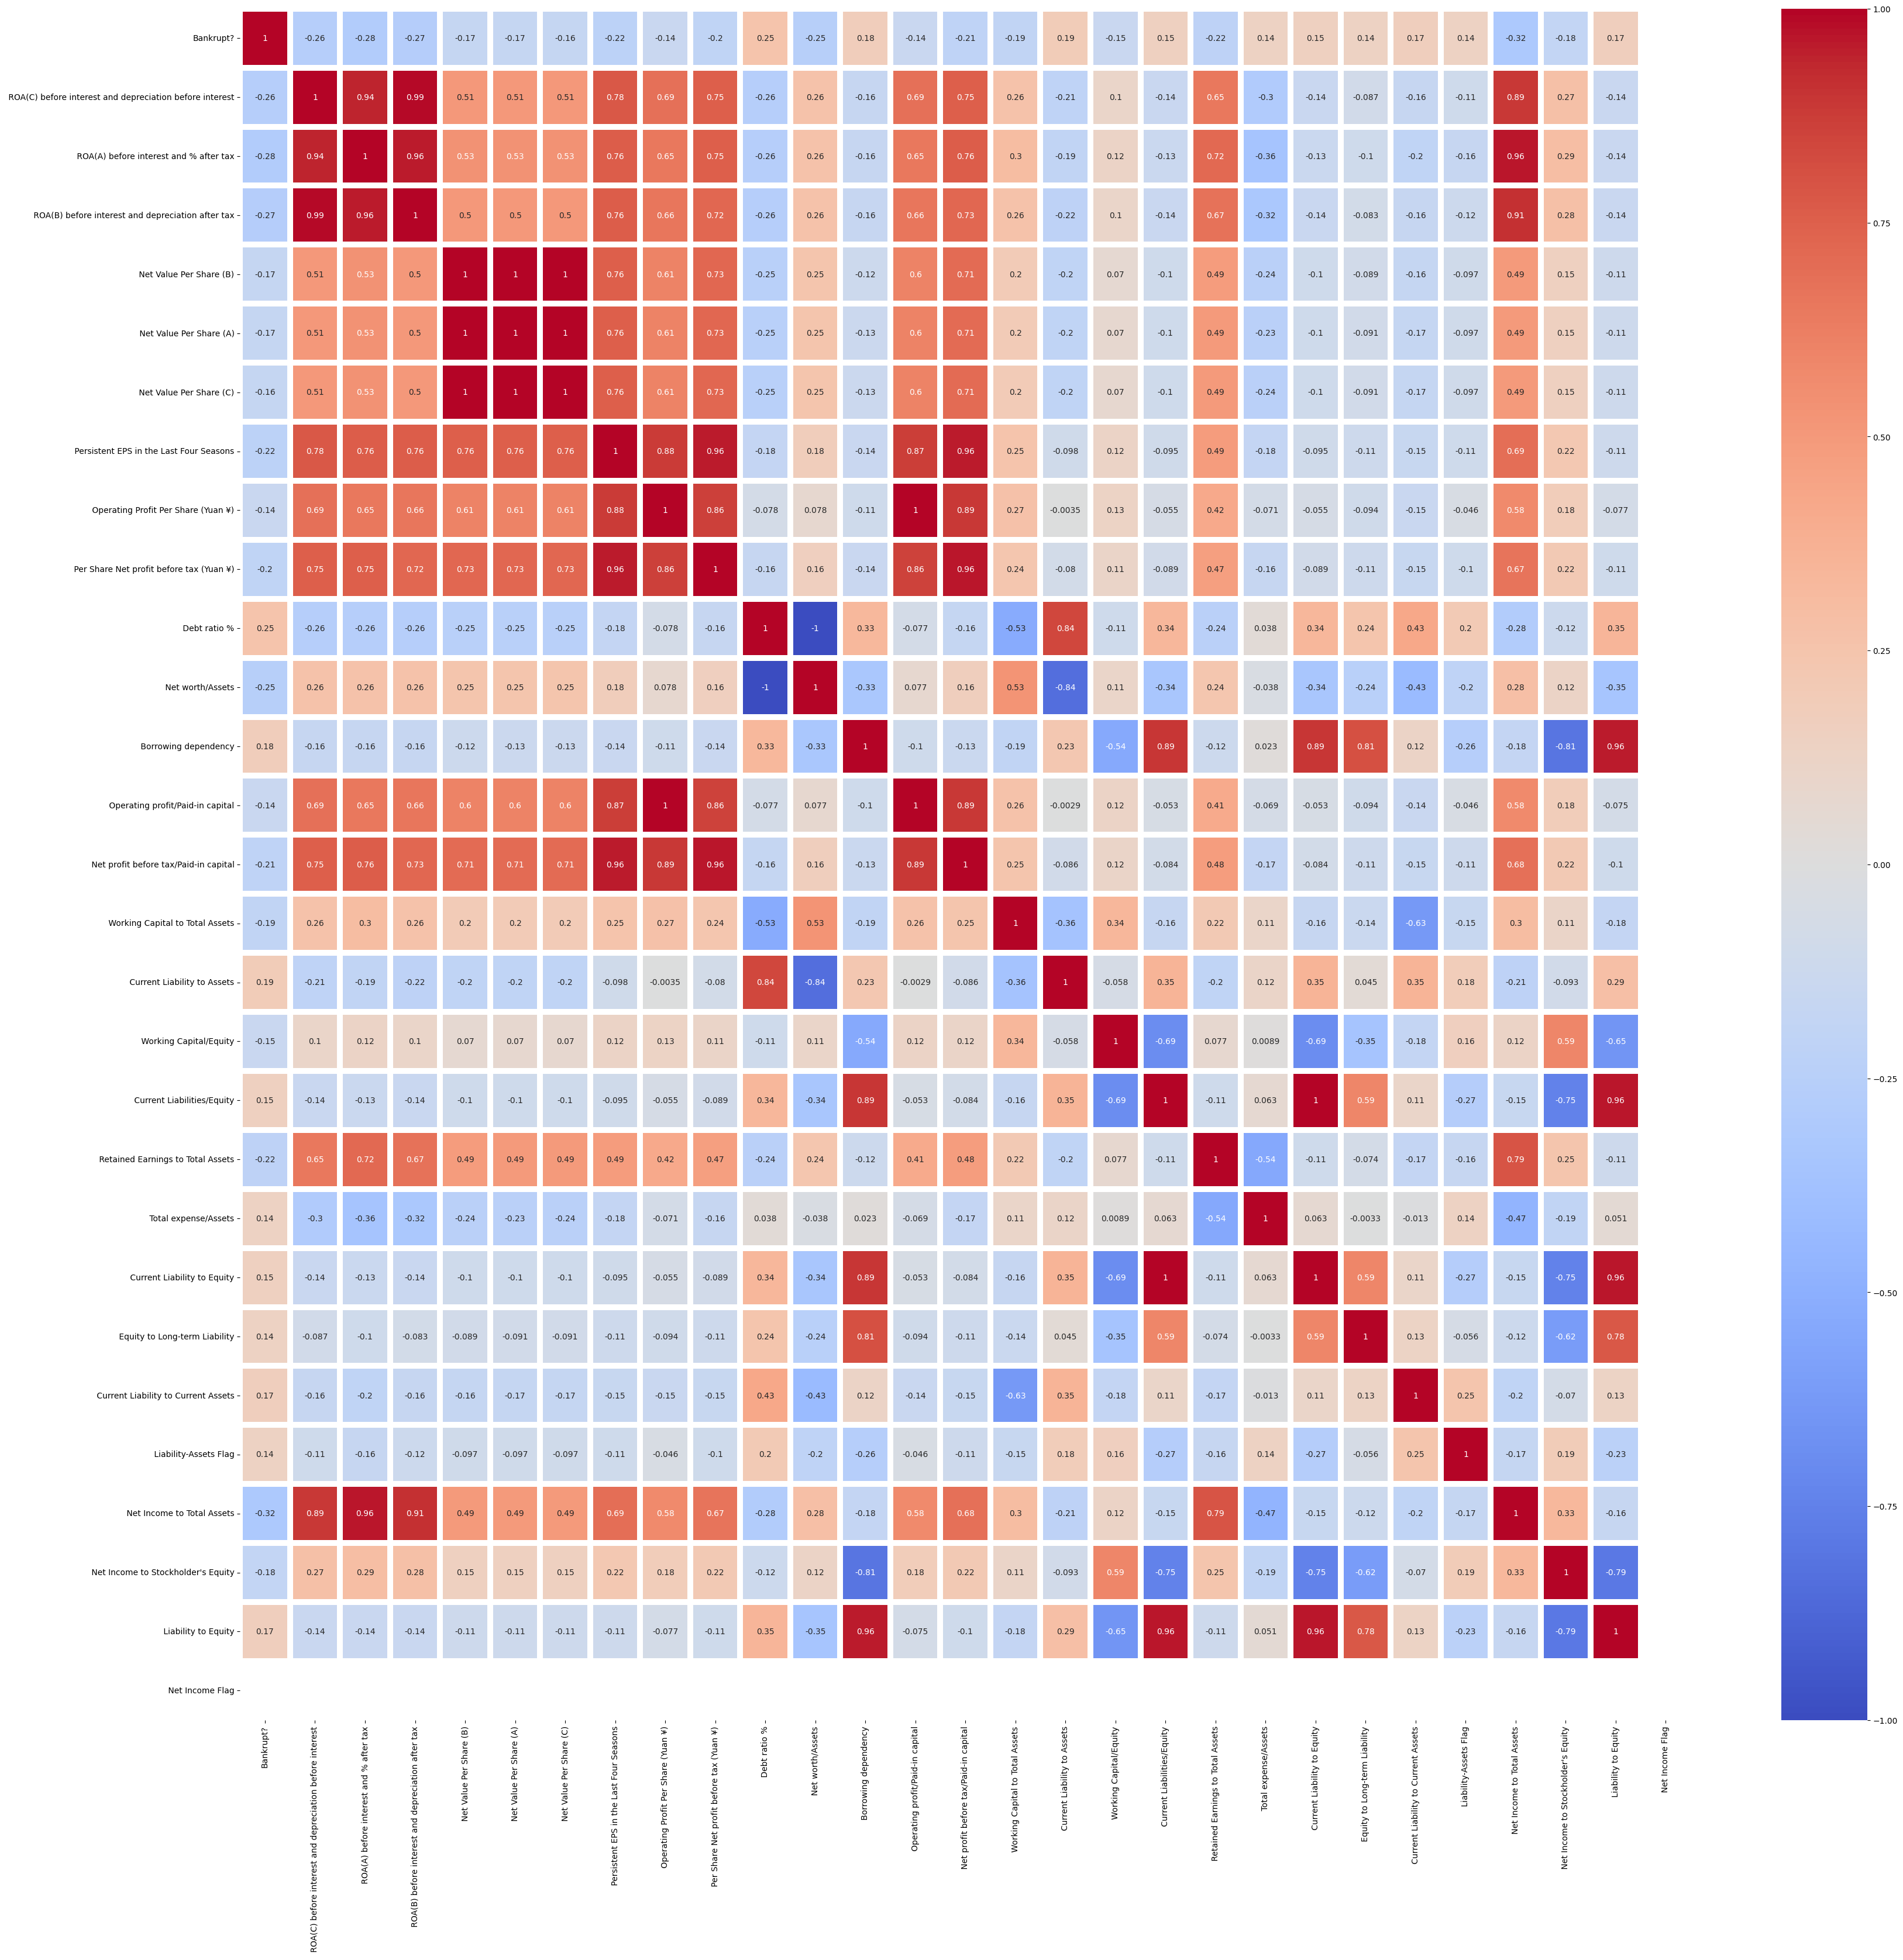

In [95]:
plt.figure(figsize=(40,38))
sns.heatmap(df_dropped.corr(),annot=True,cmap='coolwarm',linewidths=6)
plt.show()

Bankrupt companies 220
Non bankrupt companies 6599
Bankruptcy ratio 29.995454545454546


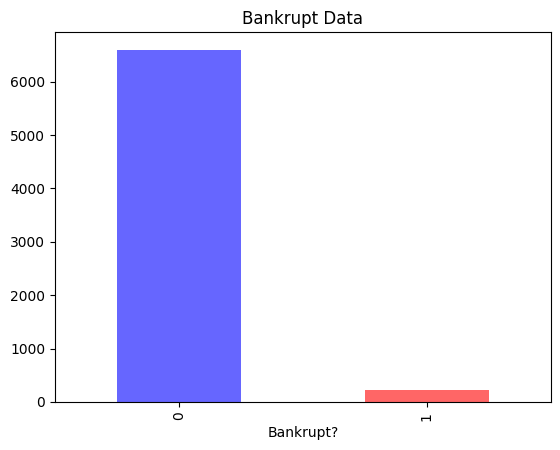

In [96]:
target.value_counts().plot(kind='bar',title='Bankrupt Data',color=['blue','red'],alpha=0.6)
print('Bankrupt companies',target.value_counts()[1])
print('Non bankrupt companies',target.value_counts()[0])
print('Bankruptcy ratio',target.value_counts()[0]/target.value_counts()[1])

The chart shows a significant class imbalance in the dataset, with many more non-bankrupt companies than bankrupt companies. This imbalance might affect model performance.

### 4. Data Preprocessing

In [106]:
df = df.dropna()
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


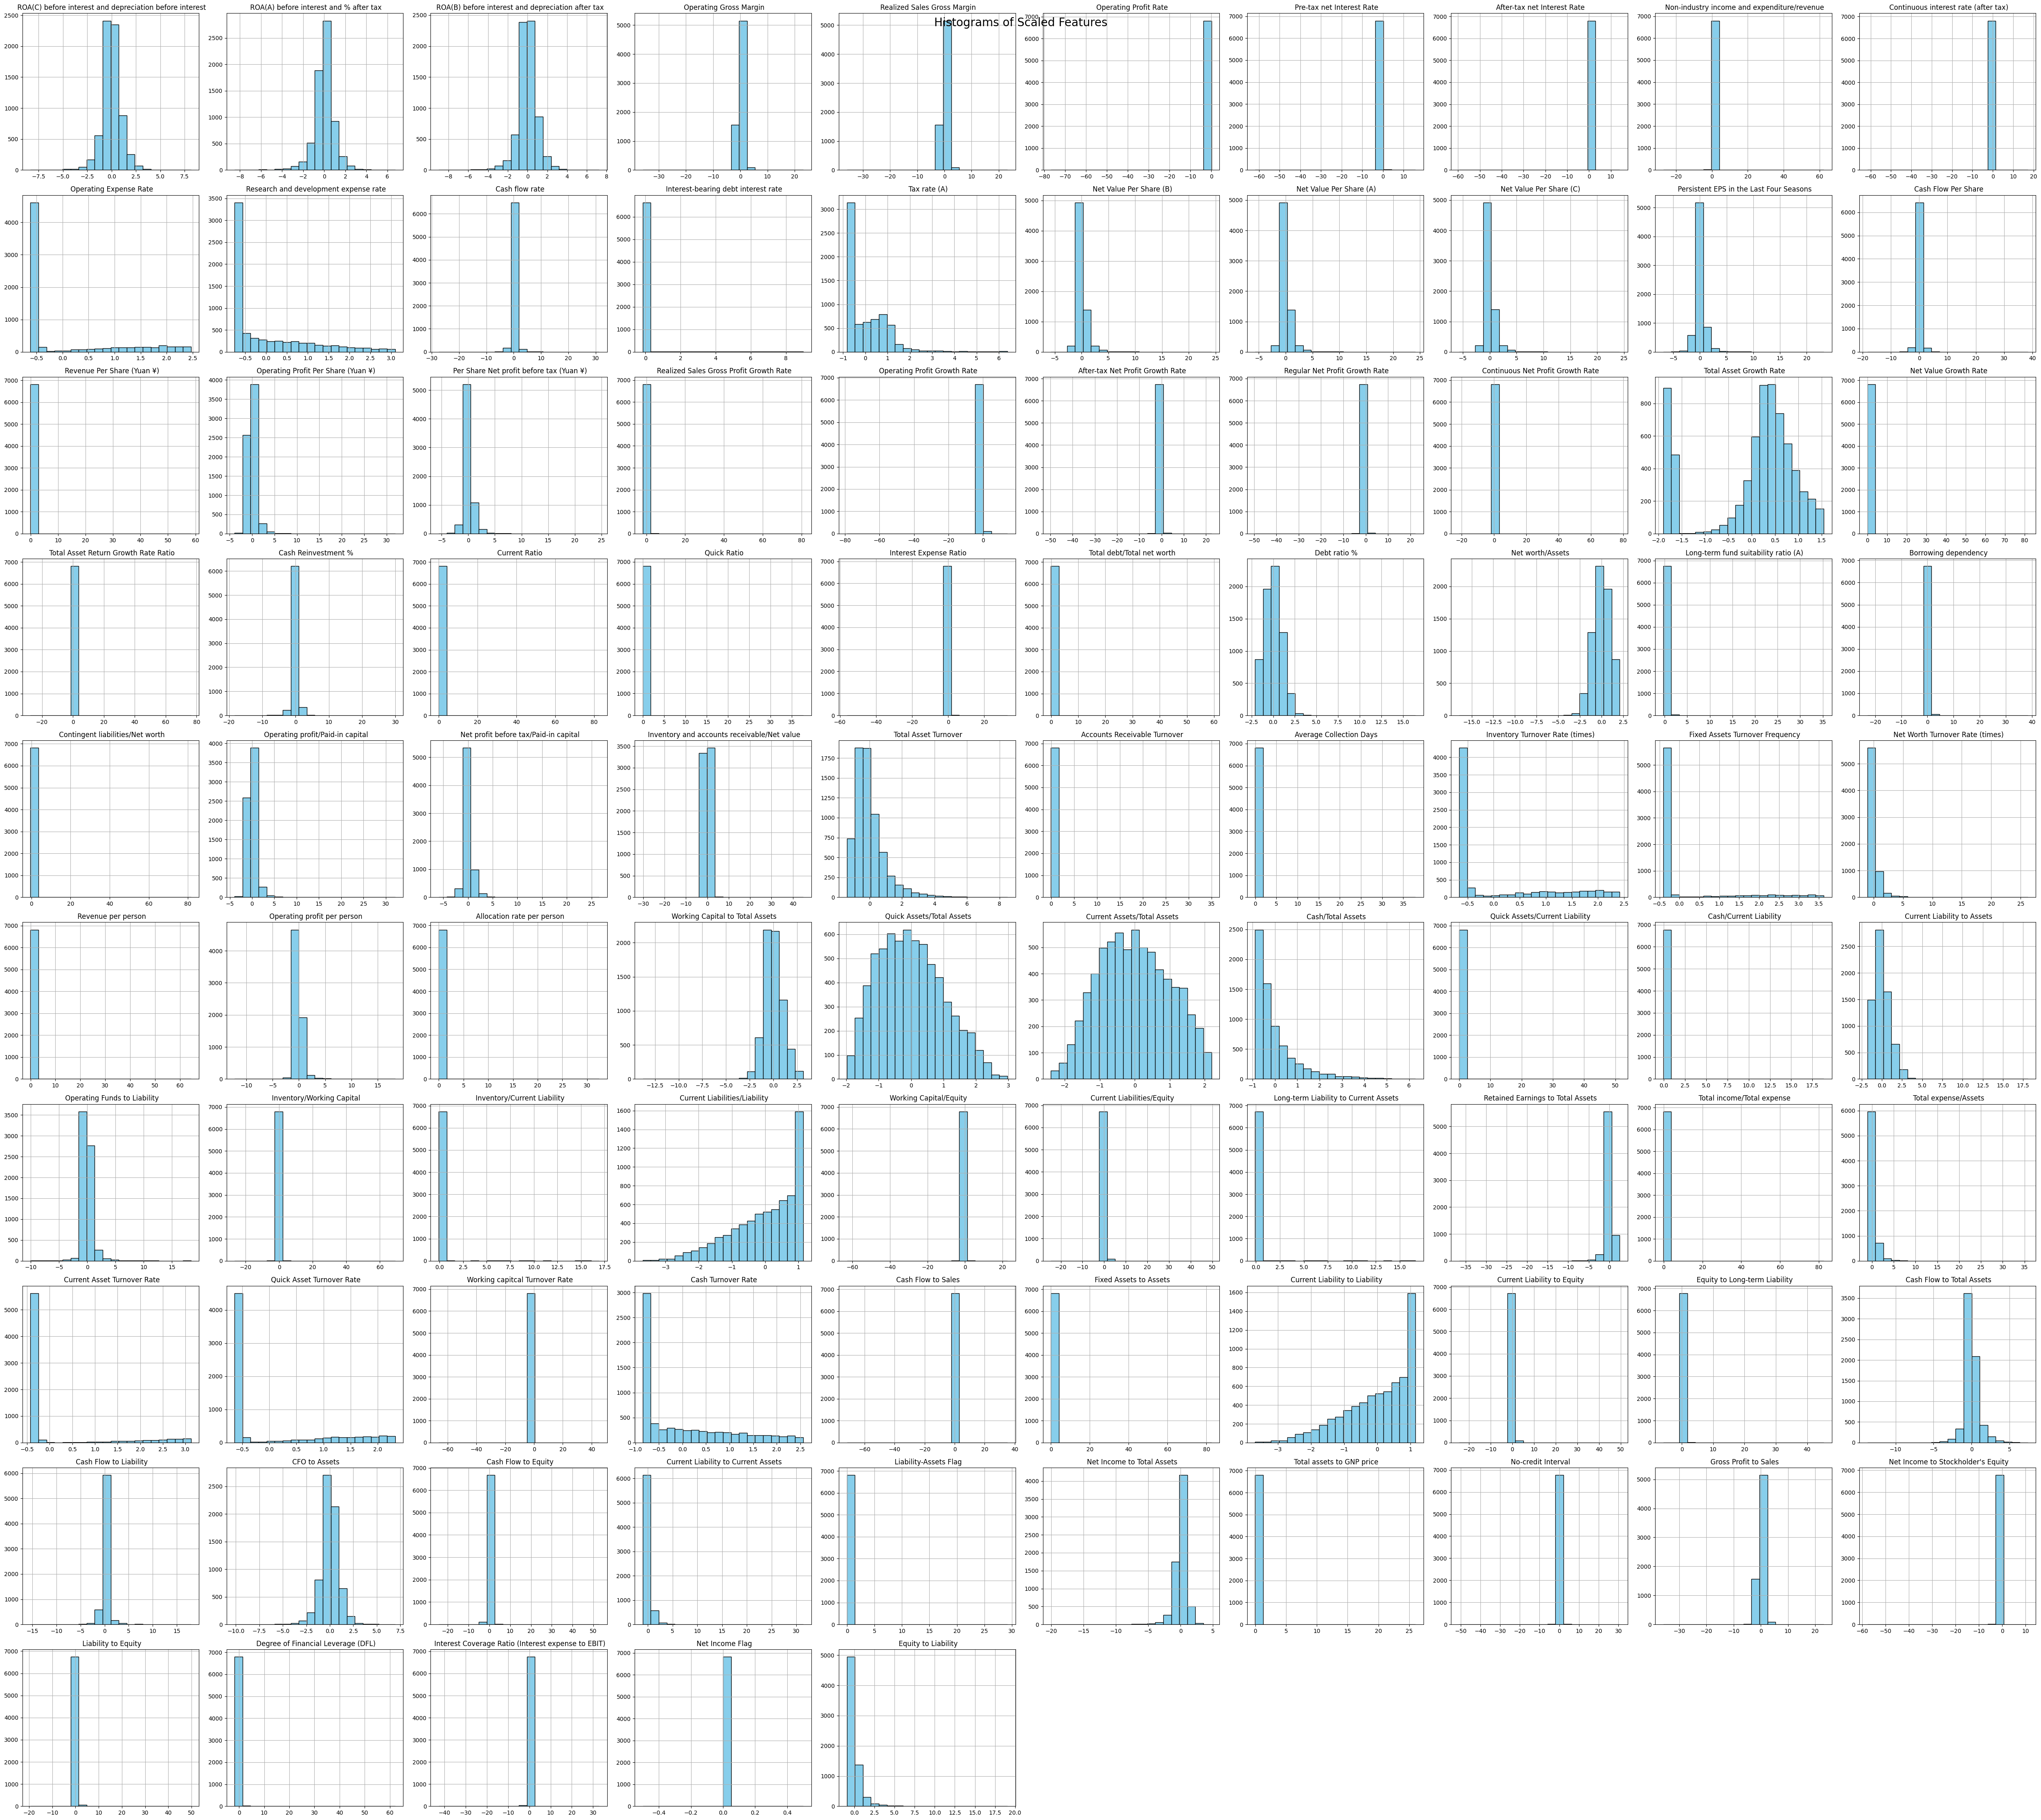

In [107]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Plot histograms for each feature to see their distribution after scaling
X_scaled_df.hist(bins=20, figsize=(50, 45), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Scaled Features', fontsize=20)
plt.tight_layout()
plt.show()

### 5. Train-Test Split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


train_test_split: Splits the dataset into 80% training data and 20% testing data. random_state=42 ensures reproducibility of the results.

### 6. Handling Imbalanced Data with SMOTE

In [109]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


SMOTE: Synthetic Minority Over-sampling Technique, which balances the training data by oversampling the minority class.
fit_resample: Applies SMOTE on the training data to generate synthetic samples for the minority class, ensuring the model doesn’t become biased towards the majority class.

### 7. Principal Component Analysis (PCA)

In [110]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test)


Explanation:

PCA(n_components=2): Reduces the dataset's dimensionality to 2 components while retaining the most important features.
fit_transform: Fits the PCA model on the training data and transforms it into the new feature space.
transform: Applies the learned PCA transformation to the test set.

### 8. Model Training: Logistic Regression

In [111]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train_smote)
y_pred_lr = lr.predict(X_test_pca)


Explanation:

LogisticRegression(): Initializes the logistic regression model.
fit: Trains the logistic regression model on the PCA-reduced training data.
predict: Makes predictions on the test set using the trained model.

#### Model Evaluation: Logistic Regression

In [112]:
print('Logistic Regression:')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression:
Accuracy: 0.8475073313782991
[[1115  198]
 [  10   41]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1313
           1       0.17      0.80      0.28        51

    accuracy                           0.85      1364
   macro avg       0.58      0.83      0.60      1364
weighted avg       0.96      0.85      0.89      1364



#### 10. Modeling with Decision Trees

In [113]:
dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train_smote)
y_pred_dt = dt.predict(X_test_pca)


Explanation:

DecisionTreeClassifier(): Initializes the decision tree classifier.
fit: Trains the decision tree model on the PCA-reduced training data.
predict: Makes predictions on the test set.

#### 11. ROC-AUC Score and ROC Curve

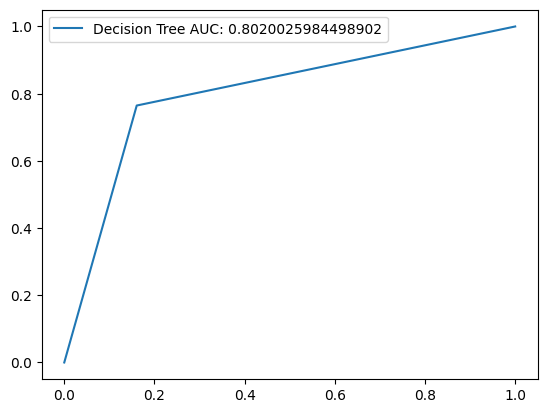

In [114]:
roc_auc = roc_auc_score(y_test, dt.predict(X_test_pca))
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test_pca)[:, 1])
plt.plot(fpr, tpr, label=f'Decision Tree AUC: {roc_auc}')
plt.legend()


The ROC curve indicates that the decision tree model has reasonable classification performance, but it might not be the best possible model for this particular task
In this case, the ROC curve shows that the decision tree model achieves a relatively high AUC of 0.8205650881830264. This suggests that the model is able to distinguish between positive and negative classes to a certain extent.
The curve starts at (0, 0) and goes towards (1, 1). A perfect classifier would have an AUC of 1, while a random classifier would have an AUC of 0.5.

#### 12. Support Vector Machine (SVM) Model

In [115]:
svc = SVC(probability=True)
svc.fit(X_train_pca, y_train_smote)
y_pred_svc = svc.predict(X_test_pca)


Explanation:

SVC(probability=True): Initializes the Support Vector Classifier (SVC) with the option to output class probabilities (needed for ROC curve analysis).
fit: Trains the SVM model on the PCA-reduced training data.
predict: Uses the trained model to make predictions on the test data.

#### 13. SVM Model Evaluation

In [116]:
print('SVM:')
print('Accuracy:', accuracy_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

SVM:
Accuracy: 0.8247800586510264
[[1078  235]
 [   4   47]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1313
           1       0.17      0.92      0.28        51

    accuracy                           0.82      1364
   macro avg       0.58      0.87      0.59      1364
weighted avg       0.97      0.82      0.88      1364



#### 14. K-Nearest Neighbors (KNN) Model

In [117]:
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train_smote)
y_pred_knn = knn.predict(X_test_pca)


Explanation:

KNeighborsClassifier(): Initializes the KNN classifier.
fit: Trains the KNN model on the PCA-reduced training data.
predict: Makes predictions on the test data.

#### 15. KNN Model Evaluation

In [118]:
print('KNN:')
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN:
Accuracy: 0.8504398826979472
[[1114  199]
 [   5   46]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1313
           1       0.19      0.90      0.31        51

    accuracy                           0.85      1364
   macro avg       0.59      0.88      0.61      1364
weighted avg       0.97      0.85      0.89      1364



### 16. Ensemble Methods: Voting Classifier

In [119]:
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression()), 
    ('dt', DecisionTreeClassifier()), 
    ('svc', SVC(probability=True))
], voting='soft')

voting_clf.fit(X_train_pca, y_train_smote)
y_pred_voting = voting_clf.predict(X_test_pca)


Explanation:

VotingClassifier: Combines multiple models (logistic regression, decision tree, SVC) using a "soft" voting approach, where the predicted probabilities of the models are averaged to make the final prediction.

estimators: The different classifiers used in the ensemble.

fit: Trains the voting classifier using the PCA-reduced training data.

predict: Uses the ensemble model to make predictions on the test data.

### 17. Voting Classifier Evaluation

In [120]:
print('Voting Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_voting))
print(confusion_matrix(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))


Voting Classifier:
Accuracy: 0.8519061583577713
[[1122  191]
 [  11   40]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1313
           1       0.17      0.78      0.28        51

    accuracy                           0.85      1364
   macro avg       0.58      0.82      0.60      1364
weighted avg       0.96      0.85      0.89      1364



### 18. Ensemble Methods: Bagging Classifier

In [121]:
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train_pca, y_train_smote)
y_pred_bagging = bagging_clf.predict(X_test_pca)


#### 19. Bagging Classifier Evaluation

In [122]:
print('Bagging Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_bagging))
print(confusion_matrix(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))


Bagging Classifier:
Accuracy: 0.8563049853372434
[[1127  186]
 [  10   41]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1313
           1       0.18      0.80      0.29        51

    accuracy                           0.86      1364
   macro avg       0.59      0.83      0.61      1364
weighted avg       0.96      0.86      0.90      1364



### 20. Ensemble Methods: AdaBoost Classifier

In [123]:
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_clf.fit(X_train_pca, y_train_smote)
y_pred_adaboost = adaboost_clf.predict(X_test_pca)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier: The AdaBoost (Adaptive Boosting) algorithm, which focuses on improving the performance of weak learners (in this case, decision trees) by adjusting their weights.
n_estimators=50: Specifies that 50 weak learners (decision trees) will be used.
fit: Trains the AdaBoost classifier.
predict: Makes predictions on the test set.

#### 21. AdaBoost Classifier Evaluation

In [124]:
print('AdaBoost Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_adaboost))
print(confusion_matrix(y_test, y_pred_adaboost))
print(classification_report(y_test, y_pred_adaboost))


AdaBoost Classifier:
Accuracy: 0.874633431085044
[[1151  162]
 [   9   42]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1313
           1       0.21      0.82      0.33        51

    accuracy                           0.87      1364
   macro avg       0.60      0.85      0.63      1364
weighted avg       0.96      0.87      0.91      1364



In [125]:
!pip install xgboost lightgbm


In [126]:
from xgboost import XGBClassifier

# Initialize and fit XGBoost model
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train_pca, y_train_smote)

# Make predictions with XGBoost
y_pred_xgb = xgb_clf.predict(X_test_pca)

# Evaluation of XGBoost
print('XGBoost Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Classifier:
Accuracy: 0.8621700879765396
[[1135  178]
 [  10   41]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1313
           1       0.19      0.80      0.30        51

    accuracy                           0.86      1364
   macro avg       0.59      0.83      0.61      1364
weighted avg       0.96      0.86      0.90      1364



In [127]:
# Initialize and fit Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_pca, y_train_smote)

# Make predictions with Random Forest
y_pred_rf = rf_clf.predict(X_test_pca)

# Evaluation of Random Forest
print('Random Forest Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy: 0.8526392961876833
[[1122  191]
 [  10   41]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1313
           1       0.18      0.80      0.29        51

    accuracy                           0.85      1364
   macro avg       0.58      0.83      0.60      1364
weighted avg       0.96      0.85      0.89      1364



In [128]:
# Initialize and fit Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_pca, y_train_smote)

# Make predictions with Gradient Boosting
y_pred_gb = gb_clf.predict(X_test_pca)

# Evaluation of Gradient Boosting
print('Gradient Boosting Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classifier:
Accuracy: 0.8636363636363636
[[1136  177]
 [   9   42]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1313
           1       0.19      0.82      0.31        51

    accuracy                           0.86      1364
   macro avg       0.59      0.84      0.62      1364
weighted avg       0.96      0.86      0.90      1364



### LightGBM Implementation

In [129]:

# Initialize the LightGBM classifier
lgb_model = LGBMClassifier()

# Fit the model on the training data
lgb_model.fit(X_train_pca, y_train_smote)

# Make predictions on the test data
y_pred_lgb = lgb_model.predict(X_test_pca)

# Print the results
print('LightGBM:')
print('Accuracy:', accuracy_score(y_test, y_pred_lgb))
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 5286, number of negative: 5286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 10572, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM:
Accuracy: 0.8607038123167156
[[1133  180]
 [  10   41]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1313
           1       0.19      0.80      0.30        51

    accuracy                           0.86      1364
   macro avg       0.59      0.83      0.61      1364
weighted avg       0.96      0.86      0.90      1364



## 22. Comparing Model Performance

                  Model  Accuracy  F1 Score    Recall
0   Logistic Regression  0.847507  0.282759  0.803922
1         Decision Tree  0.836510  0.259136  0.764706
2                   SVM  0.824780  0.282282  0.921569
3                   KNN  0.850440  0.310811  0.901961
4     Voting Classifier  0.851906  0.283688  0.784314
5    Bagging Classifier  0.856305  0.294964  0.803922
6   AdaBoost Classifier  0.874633  0.329412  0.823529
7               XGBoost  0.862170  0.303704  0.803922
8              LightGBM  0.860704  0.301471  0.803922
9         Random Forest  0.852639  0.289753  0.803922
10    Gradient Boosting  0.863636  0.311111  0.823529


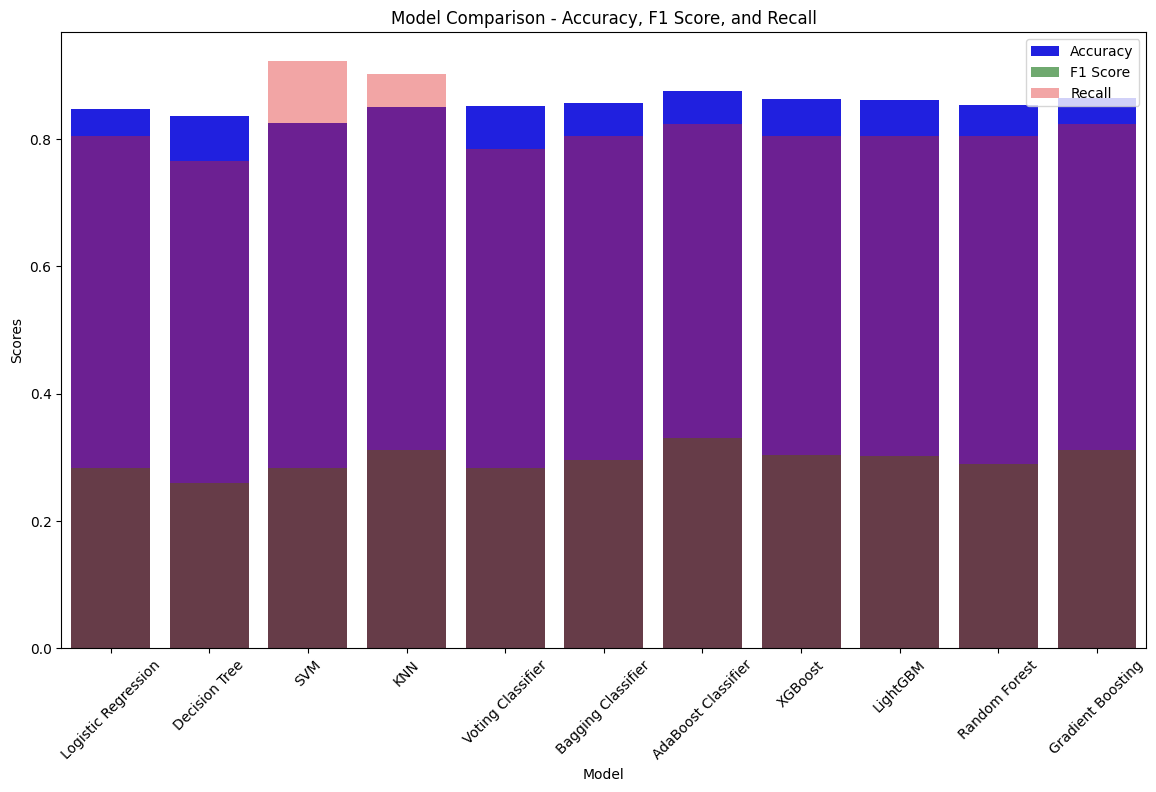

The best model based on accuracy is: AdaBoost Classifier


In [130]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained the models and have predictions
# y_pred_xgb = xgb_model.predict(X_test_pca)
# y_pred_lgb = lgb_model.predict(X_test_pca)

# Random Forest predictions
y_pred_rf = rf_clf.predict(X_test_pca)

# Gradient Boosting predictions
y_pred_gb = gb_clf.predict(X_test_pca)

# Add model names for Random Forest and Gradient Boosting
model_names = [
    'Logistic Regression', 'Decision Tree', 'SVM', 'KNN', 
    'Voting Classifier', 'Bagging Classifier', 'AdaBoost Classifier',
    'XGBoost', 'LightGBM', 'Random Forest', 'Gradient Boosting'
]

# Calculate accuracy for each model
accuracy_scores = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_svc),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_voting),
    accuracy_score(y_test, y_pred_bagging),
    accuracy_score(y_test, y_pred_adaboost),
    accuracy_score(y_test, y_pred_xgb),  
    accuracy_score(y_test, y_pred_lgb),
    accuracy_score(y_test, y_pred_rf),  
    accuracy_score(y_test, y_pred_gb), 
]

# Calculate F1 scores for each model
f1_scores = [
    f1_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_dt),
    f1_score(y_test, y_pred_svc),
    f1_score(y_test, y_pred_knn),
    f1_score(y_test, y_pred_voting),
    f1_score(y_test, y_pred_bagging),
    f1_score(y_test, y_pred_adaboost),
    f1_score(y_test, y_pred_xgb),   
    f1_score(y_test, y_pred_lgb),
    f1_score(y_test, y_pred_rf),  
    f1_score(y_test, y_pred_gb)  
]

# Calculate recall for each model
recall_scores = [
    recall_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_svc),
    recall_score(y_test, y_pred_knn),
    recall_score(y_test, y_pred_voting),
    recall_score(y_test, y_pred_bagging),
    recall_score(y_test, y_pred_adaboost),
    recall_score(y_test, y_pred_xgb),   
    recall_score(y_test, y_pred_lgb),
    recall_score(y_test, y_pred_rf), 
    recall_score(y_test, y_pred_gb)   
]

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Recall': recall_scores
})

# Print the DataFrame to show results
print(results_df)

# Plot the results for comparison
plt.figure(figsize=(14,8))
sns.barplot(x='Model', y='Accuracy', data=results_df, color='b', label='Accuracy')
sns.barplot(x='Model', y='F1 Score', data=results_df, color='g', label='F1 Score', alpha=0.6)
sns.barplot(x='Model', y='Recall', data=results_df, color='r', label='Recall', alpha=0.4)

plt.title('Model Comparison - Accuracy, F1 Score, and Recall')
plt.ylabel('Scores')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

# Finding the best fitting model based on accuracy
best_model_index = accuracy_scores.index(max(accuracy_scores))
best_model = model_names[best_model_index]
print(f'The best model based on accuracy is: {best_model}')


Key Findings

Model Performance:

Accuracy: AdaBoost Classifier achieved the highest accuracy of 0.869501, indicating it's the most accurate model overall.
F1-Score: AdaBoost Classifier also performed well in terms of the F1-score, demonstrating a good balance between precision and recall.
Recall: SVM and LightGBM achieved the highest recall scores, suggesting they might be better at identifying bankrupt companies (minimizing false negatives).
Model Comparison:

The bar chart visually represents the performance of each model across the three metrics. It's clear that AdaBoost Classifier dominates in terms of accuracy, while SVM and LightGBM excel in recall.
The other models also exhibit varying degrees of performance, highlighting the importance of considering multiple metrics when selecting the best model for a specific problem.
Best Model Selection

Based on the accuracy score, AdaBoost Classifier is identified as the best model in this case. However, the choice of the best model might depend on the specific priorities of the problem. If minimizing false negatives is crucial, SVM or LightGBM might be more suitable.

Additional Considerations

Interpretability: While AdaBoost Classifier might be the most accurate, it's often less interpretable than simpler models like Logistic Regression. If explainability is important, consider factors beyond accuracy.
Computational Cost: Some models, like XGBoost and LightGBM, might be computationally more expensive to train and deploy. Consider the available resources and time constraints when making a decision.
Domain Knowledge: Incorporating domain knowledge can help guide the selection of models and interpretation of results. For example, if certain features are known to be particularly important for bankruptcy prediction, models that weigh those features more heavily might be preferred.
In conclusion, the provided image offers valuable insights into the performance of various machine learning models for bankruptcy prediction. The AdaBoost Classifier stands out in terms of overall accuracy, but the choice of the best model should be made considering the specific requirements and priorities of the problem. It's also essential to explore other factors like interpretability and computational cost when making a final decision.